<a href="https://colab.research.google.com/github/dev-faisal-ahmed/Vehi-Classifier/blob/master/custom_object_detection_with_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mounting google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
# chcking the gpu
!nvidia-smi

Sun Nov 26 17:31:01 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# installing ultralytics
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.8/645.8 kB 8.5 MB/s eta 0:00:00


In [4]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.218 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


In [7]:
# Training the model
!yolo task=detect mode=train model=yolov8m.pt data=data.yaml epochs=30 imgsz=640 plots=True

Ultralytics YOLOv8.0.218 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, 

In [8]:
# To donwload the model and other requied stuff.
import shutil
shutil.make_archive("runs","zip", "runs")
from google.colab import files
files.download('runs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
from IPython.display import Image

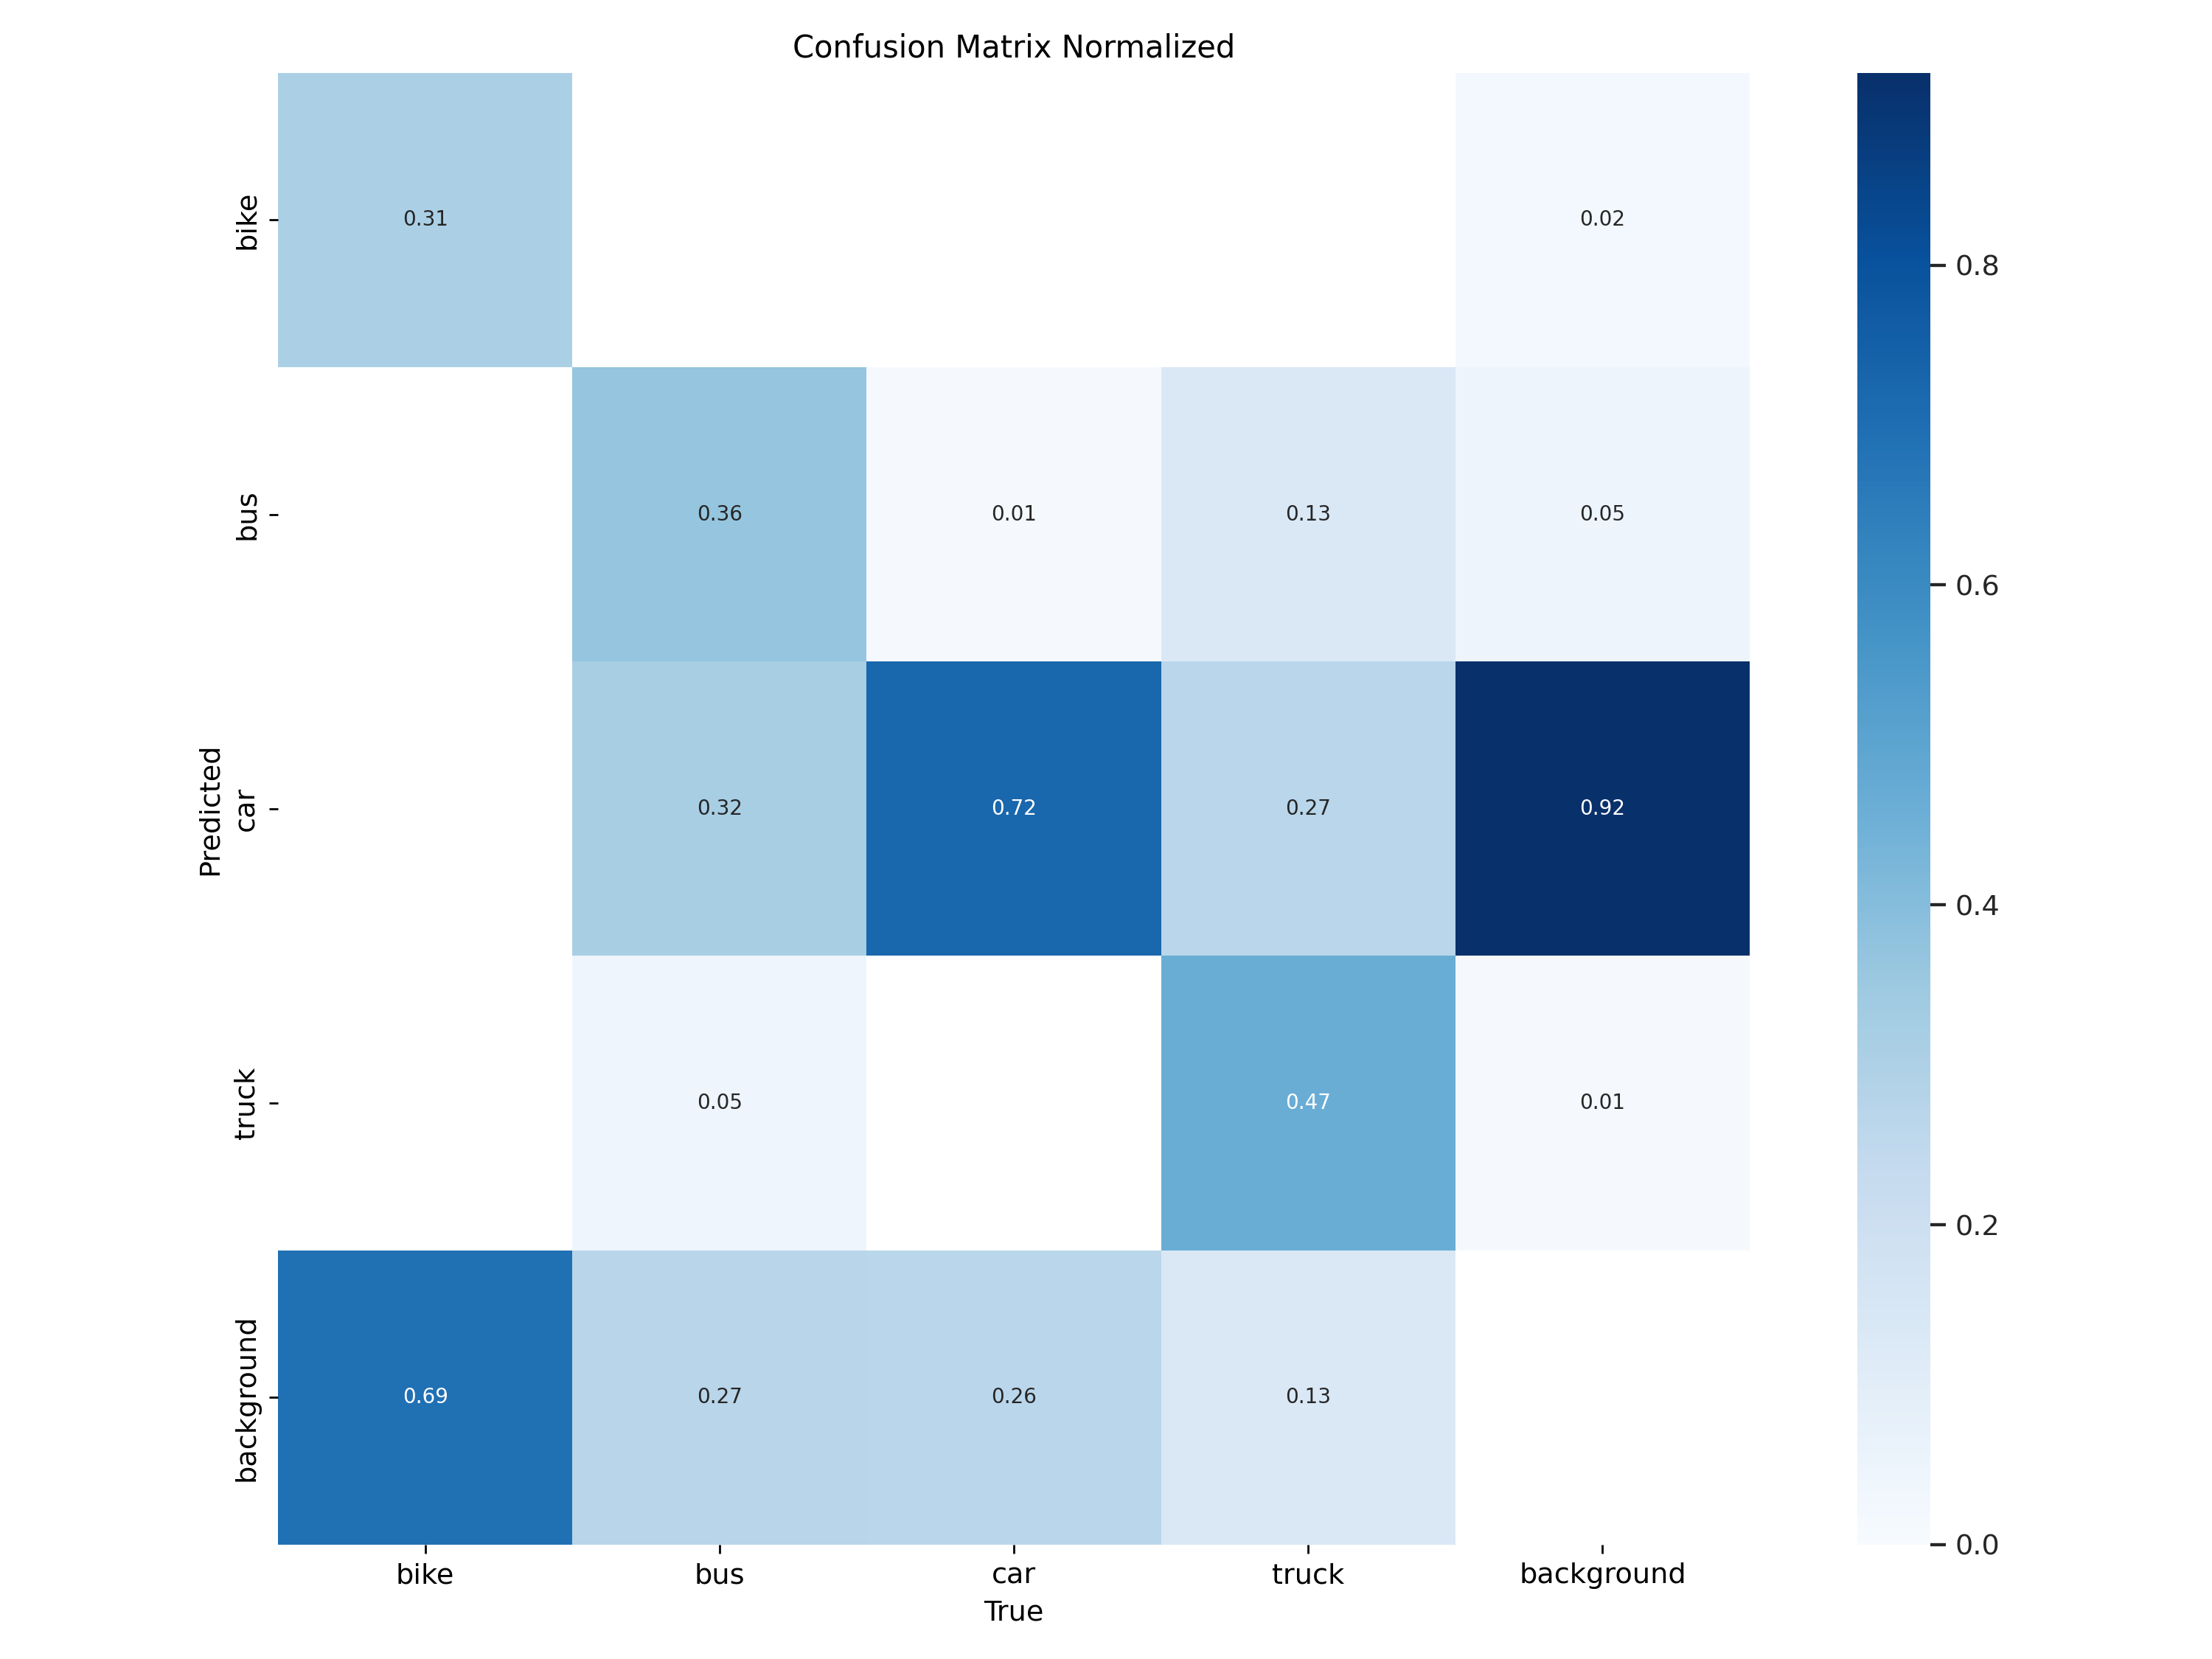

In [10]:
Image(filename="/content/drive/MyDrive/AI-Project/yolo-custom-object/trained-model/confusion_matrix_normalized.png", height=500)

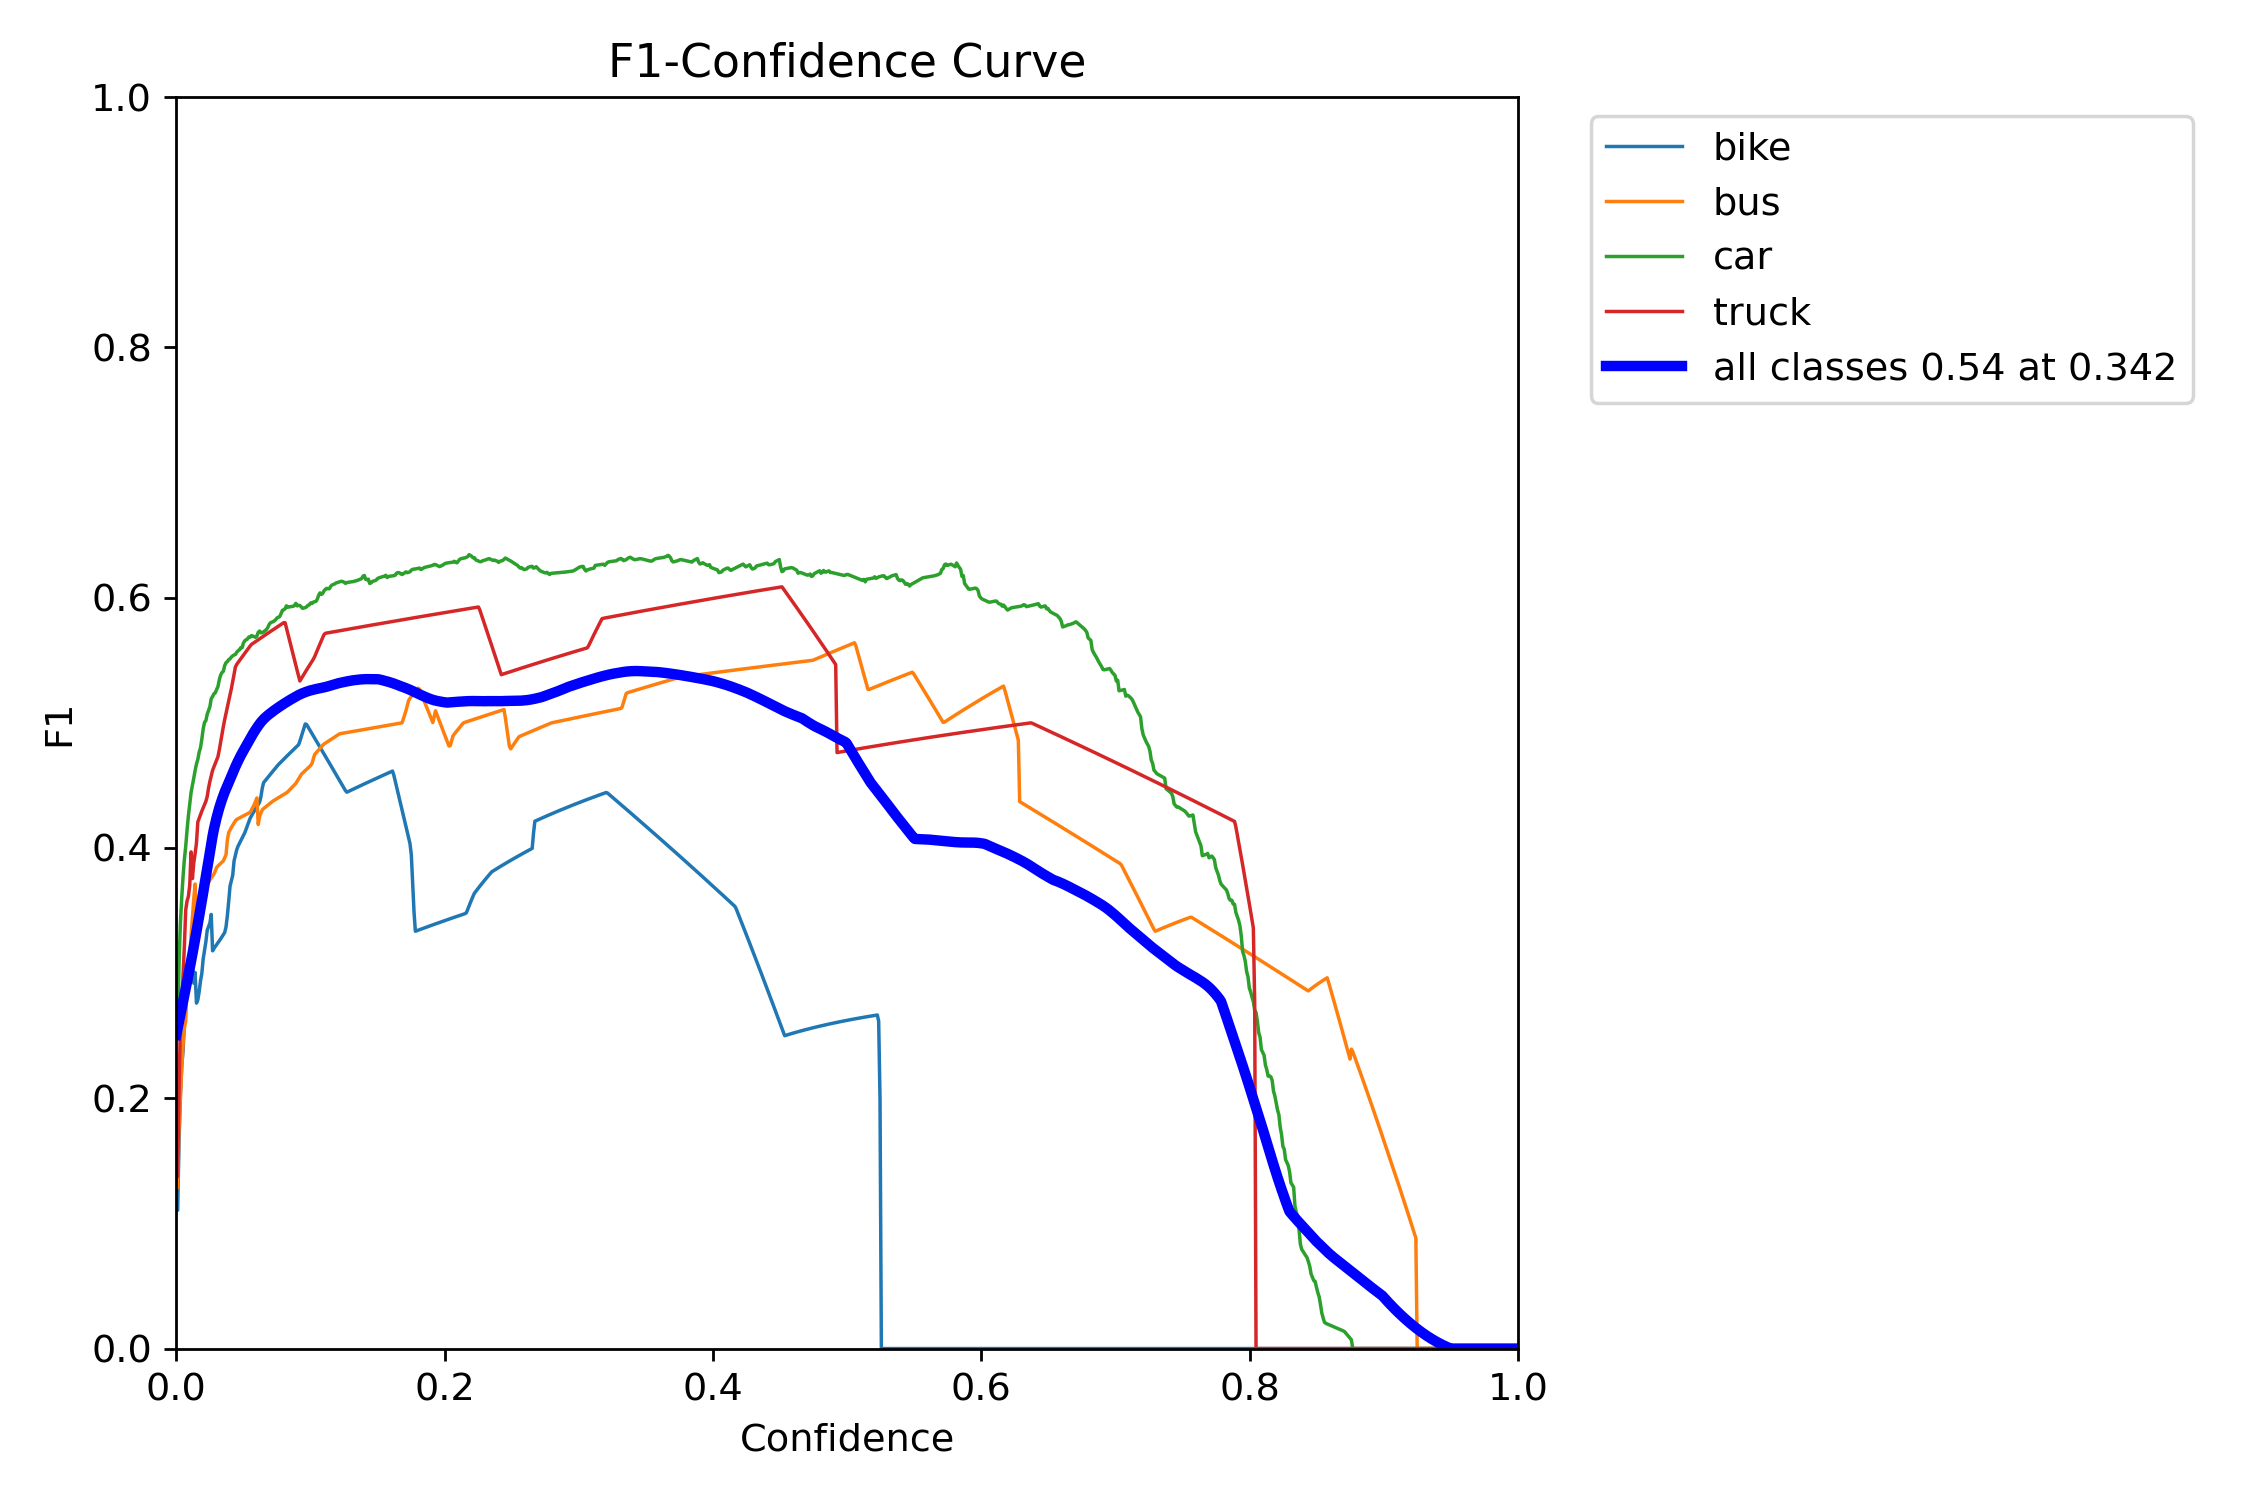

In [11]:
Image(filename="/content/drive/MyDrive/AI-Project/yolo-custom-object/trained-model/F1_curve.png", height=500)

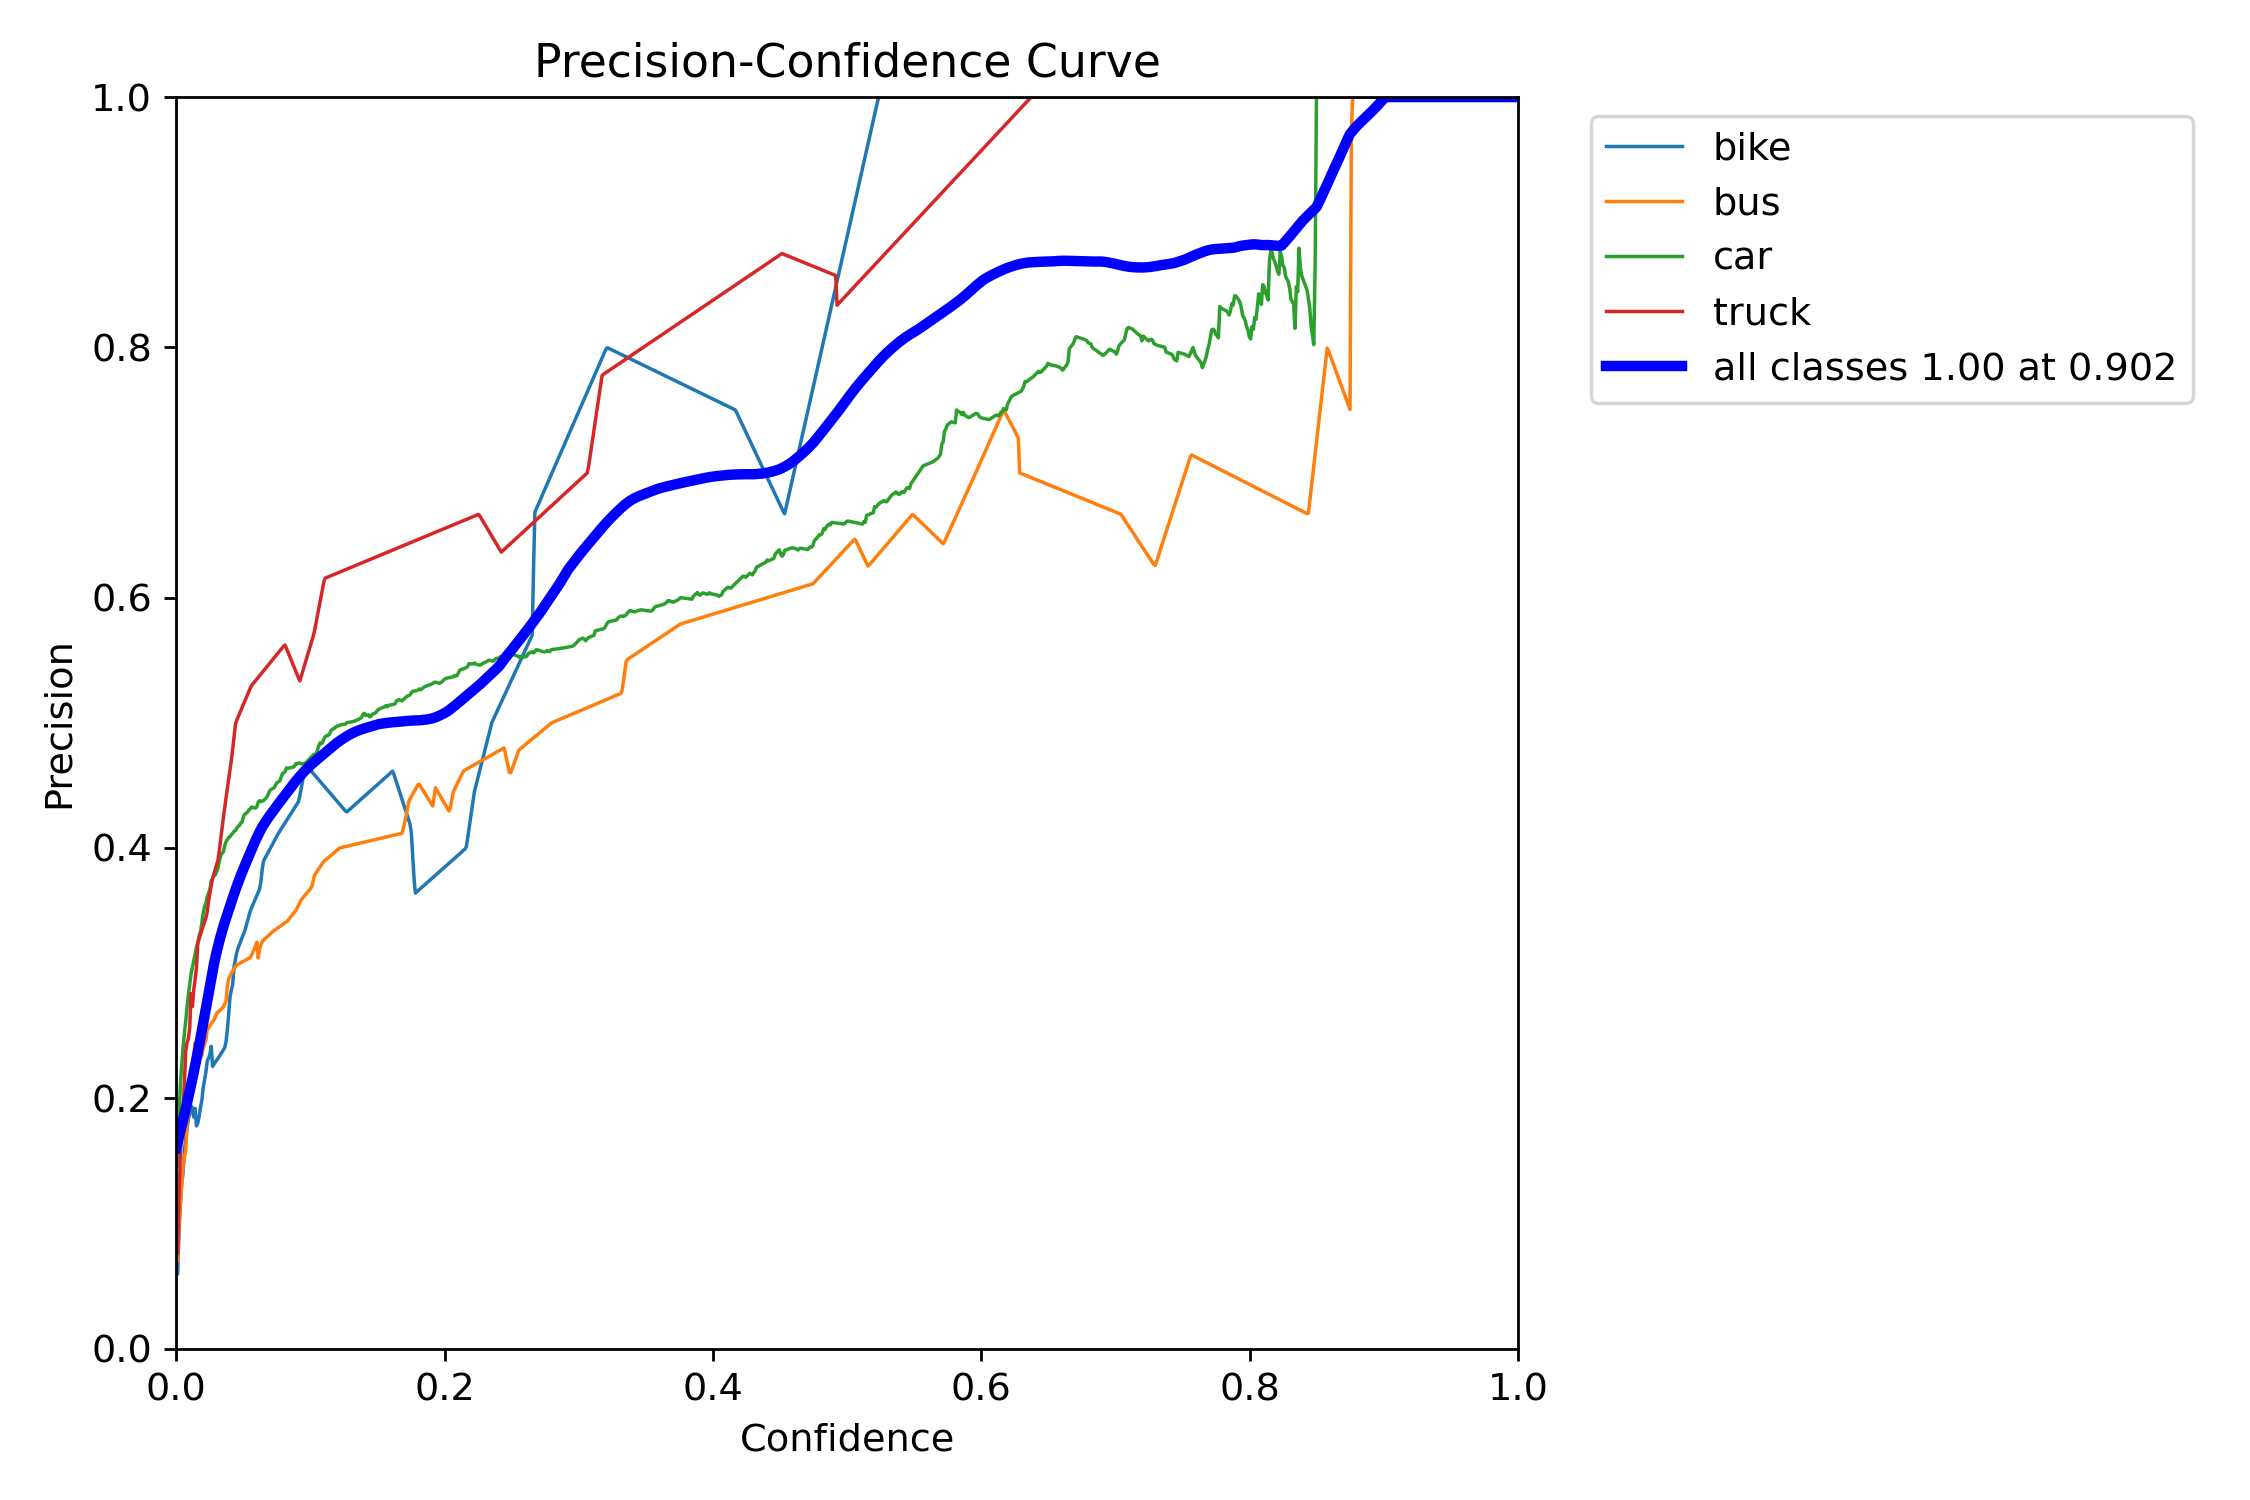

In [13]:
Image(filename="/content/drive/MyDrive/AI-Project/yolo-custom-object/trained-model/P_curve.png", height=500)

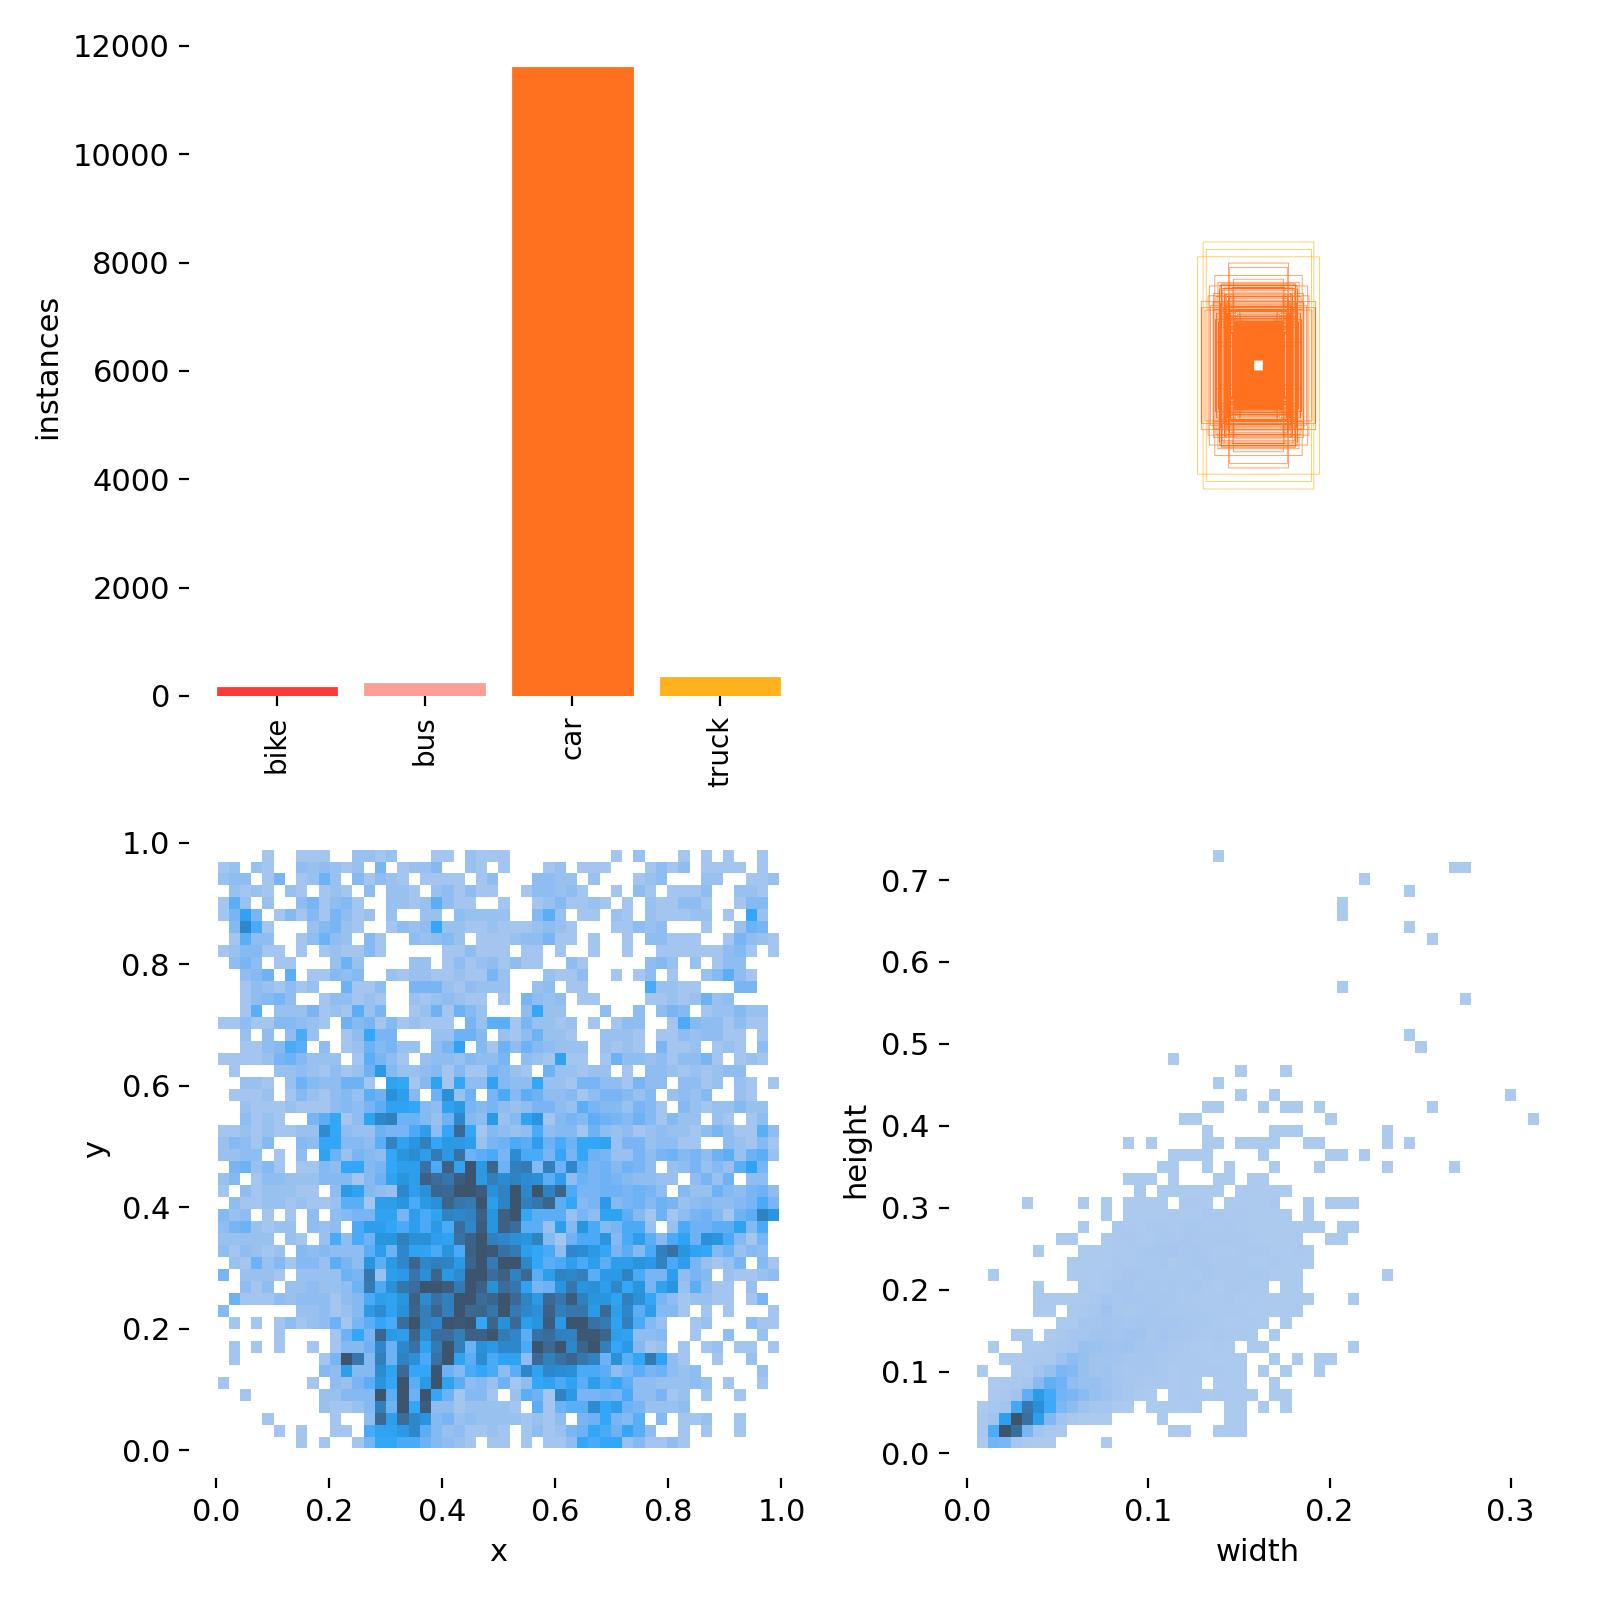

In [14]:
Image(filename="/content/drive/MyDrive/AI-Project/yolo-custom-object/trained-model/labels.jpg", height=500)

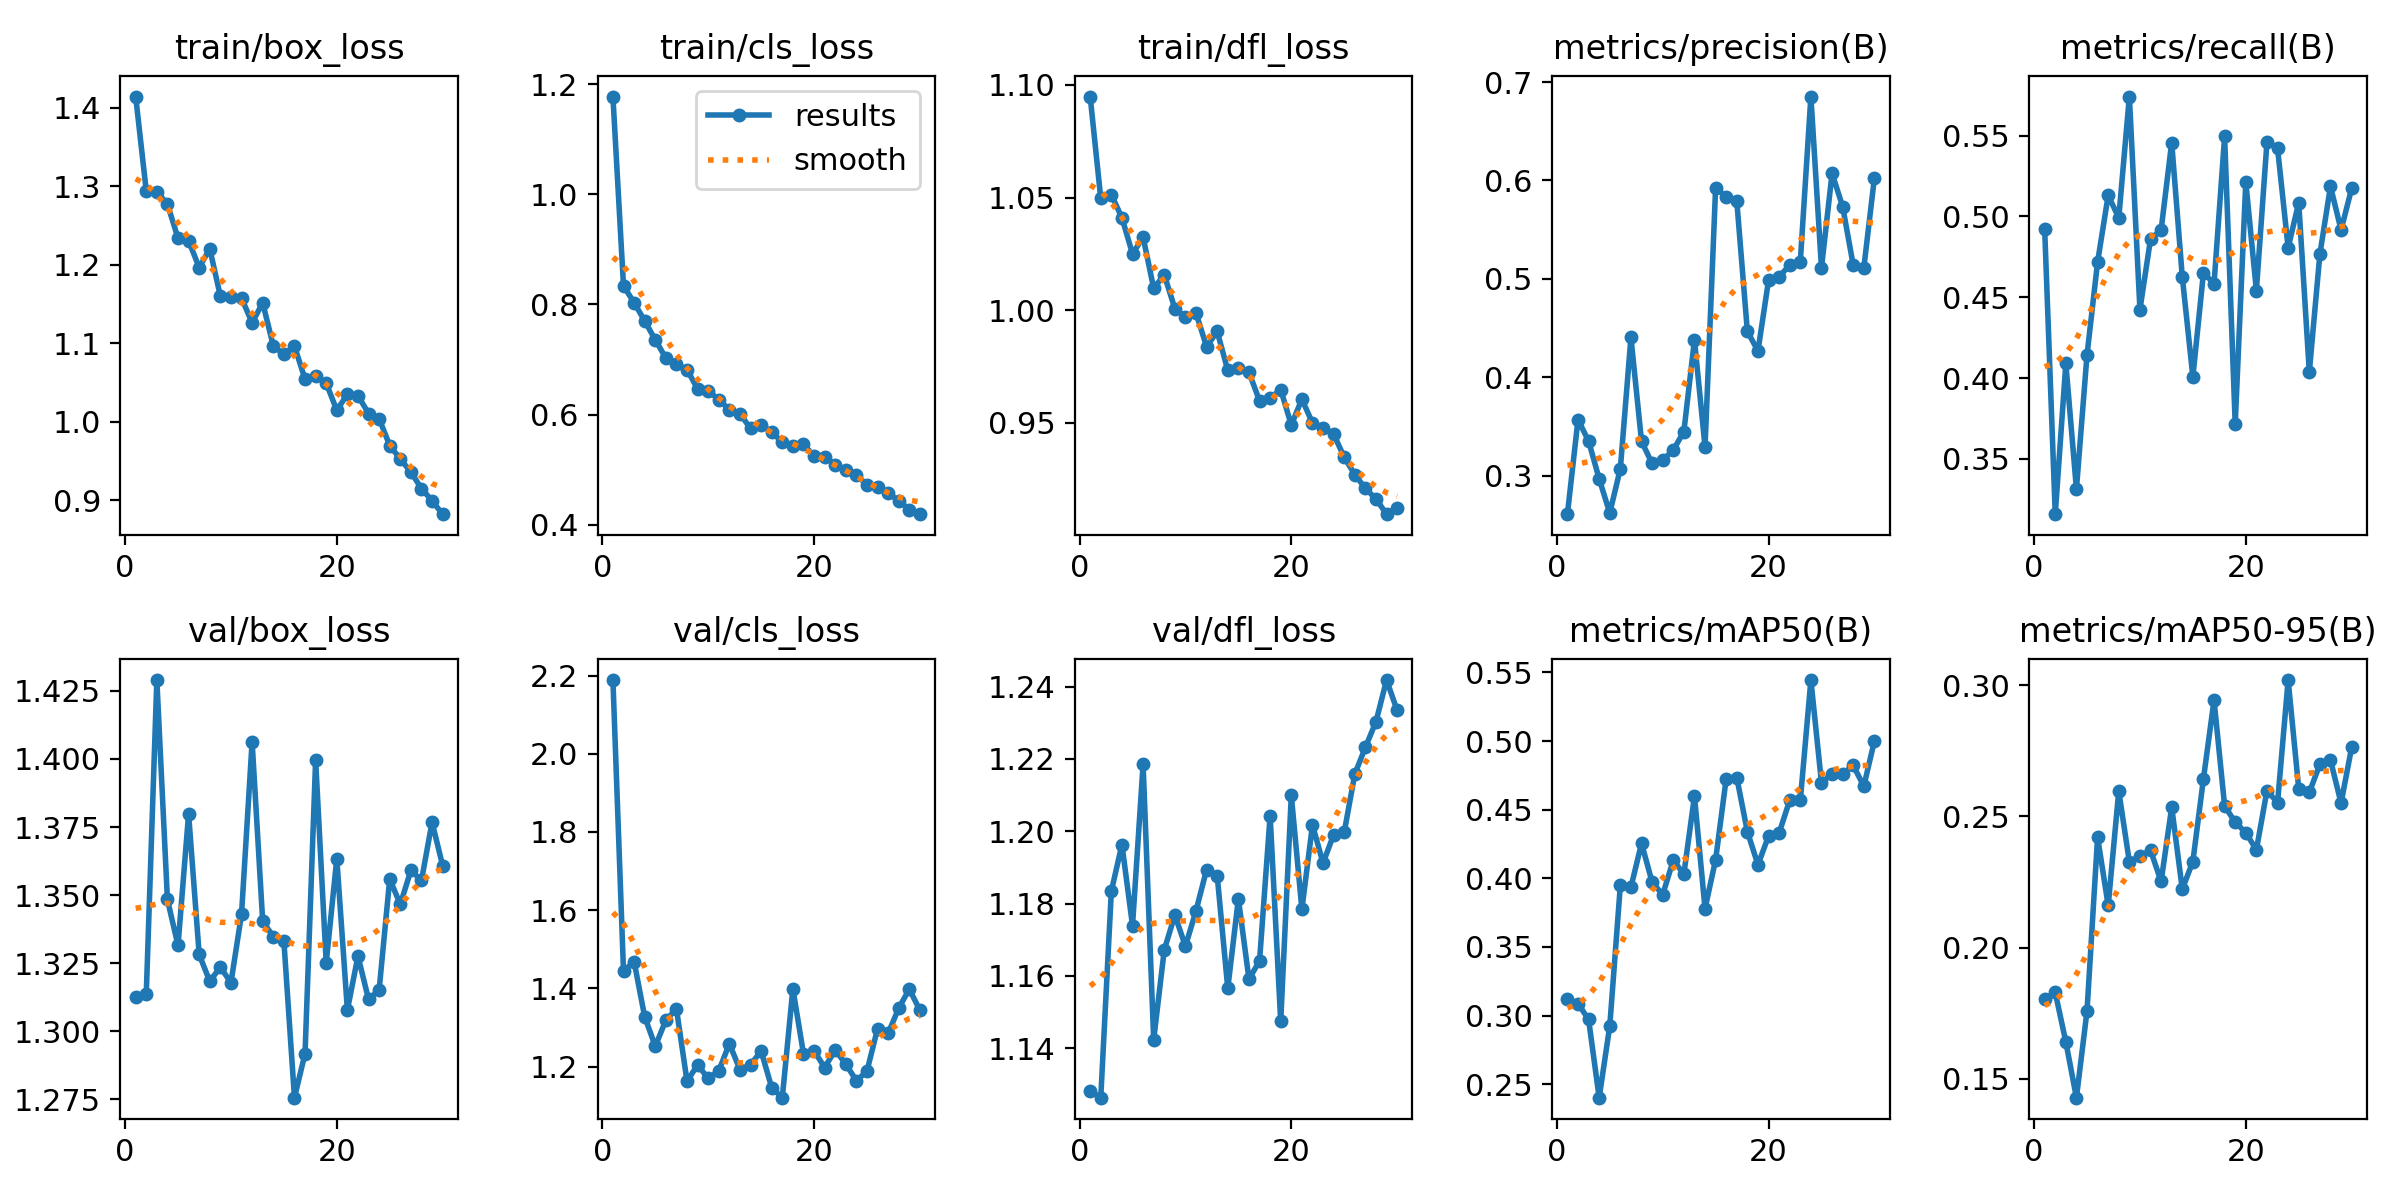

In [16]:
Image(filename="/content/drive/MyDrive/AI-Project/yolo-custom-object/trained-model/results.png", height=500)

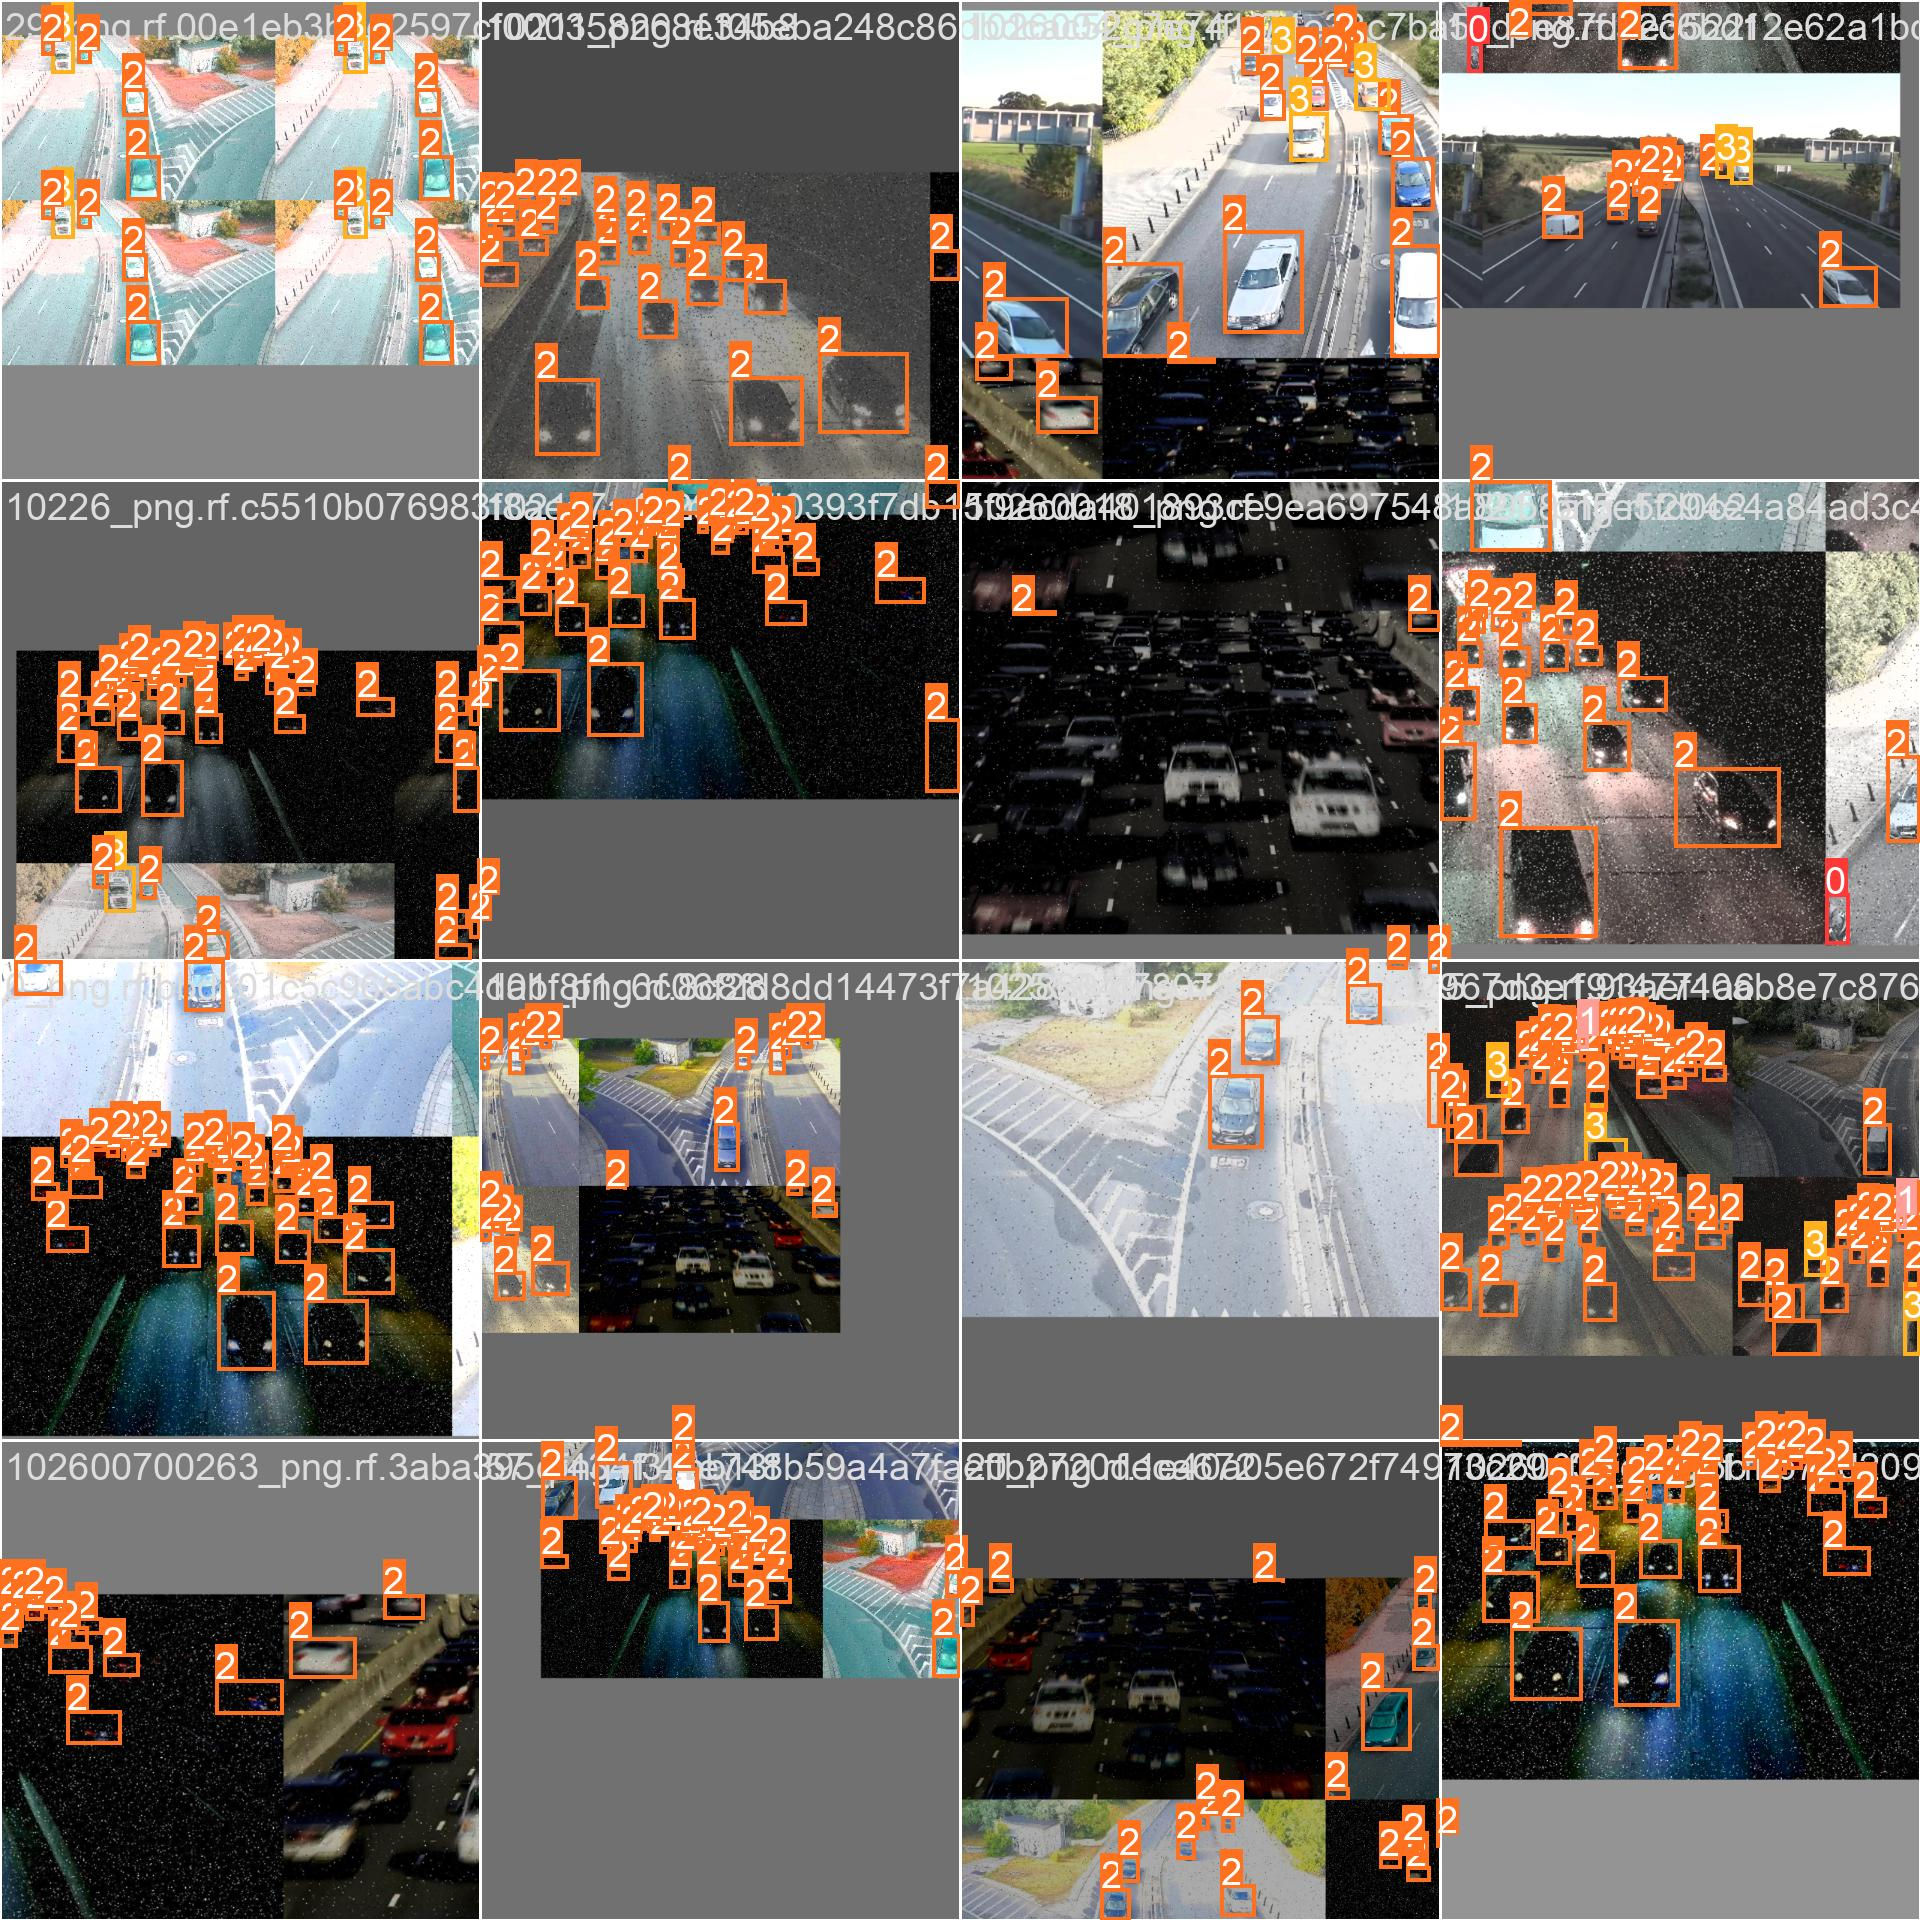

In [17]:
Image(filename="/content/drive/MyDrive/AI-Project/yolo-custom-object/trained-model/train_batch0.jpg", height=500)

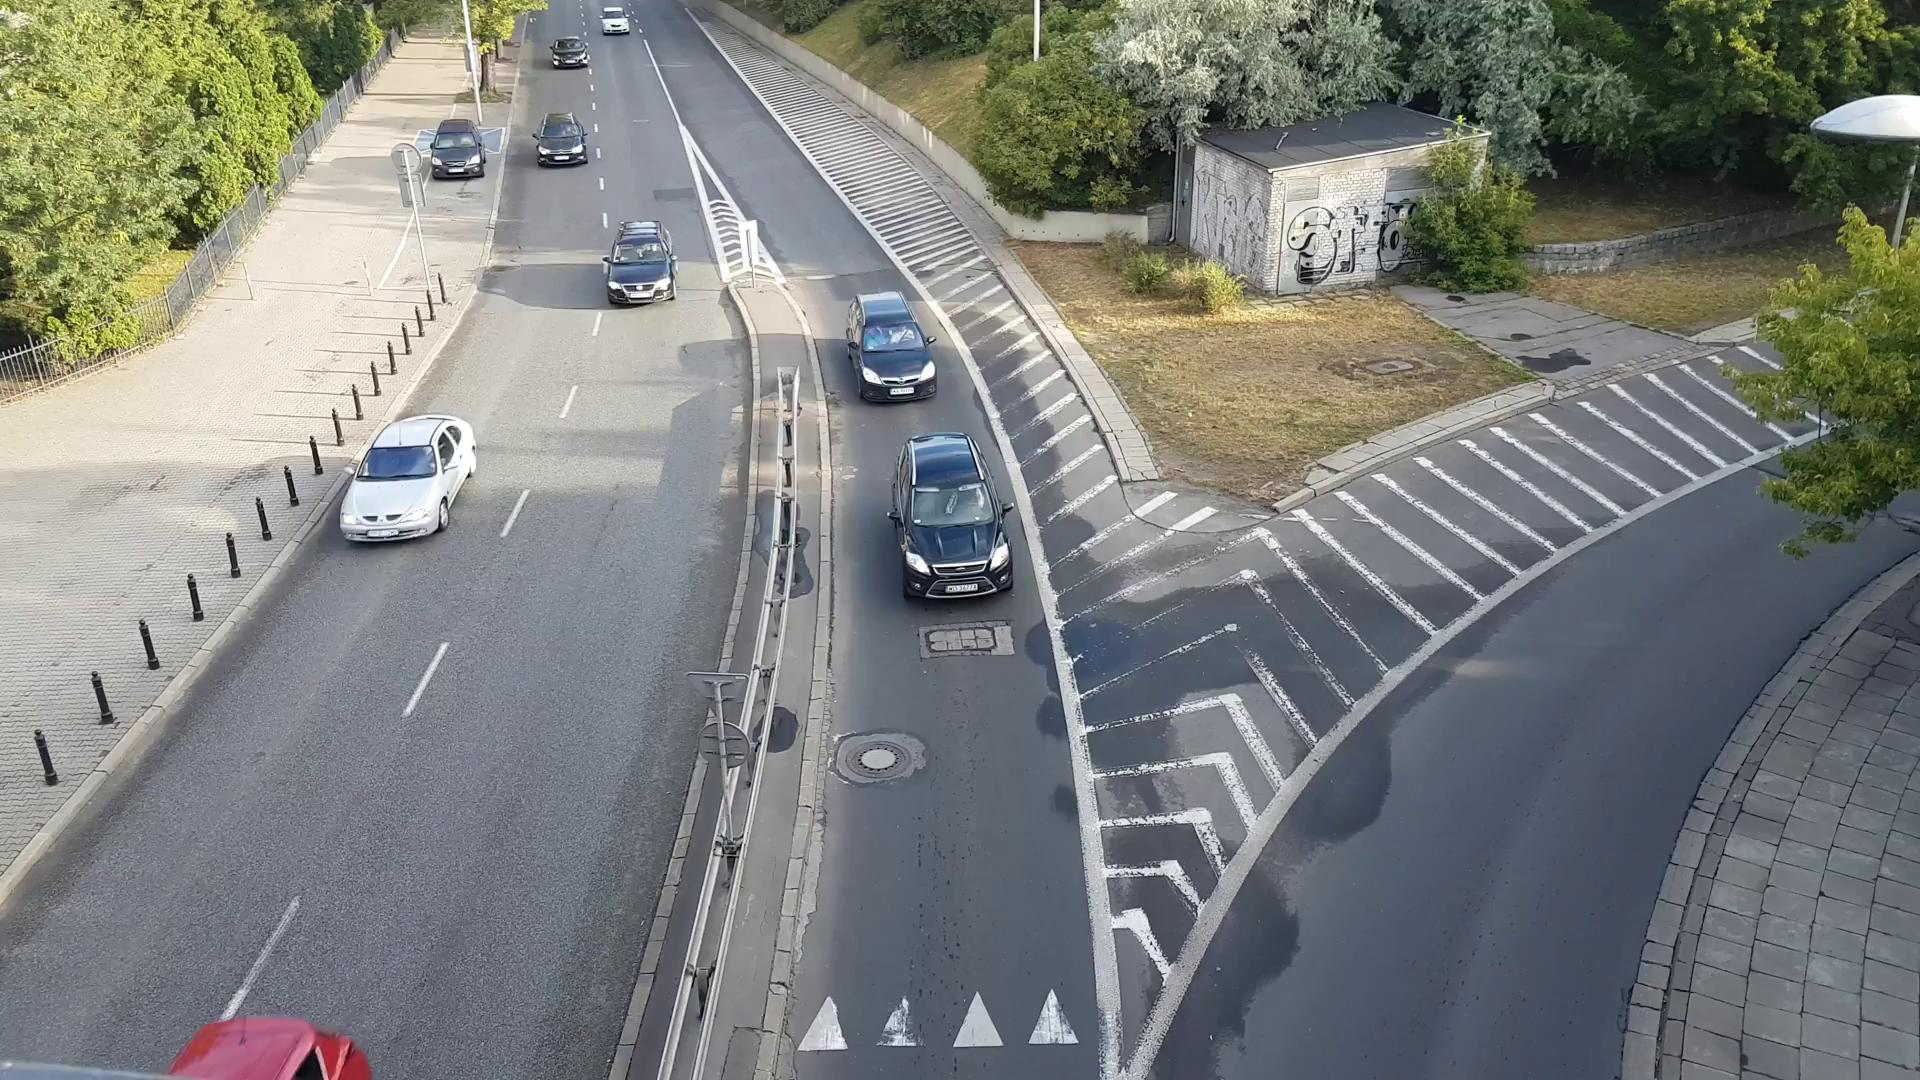

In [24]:
# An Image before Prediction
Image(filename="/content/drive/MyDrive/AI-Project/yolo-custom-object/data-sets/train/images/0_png.rf.85255ba703f2d5fe68e4250f55a03c4b.jpg", height=500)

In [29]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/AI-Project/yolo-custom-object/trained-model/weights/best.pt conf=0.5 source=/content/drive/MyDrive/AI-Project/yolo-custom-object/data-sets/train/images/0_png.rf.85255ba703f2d5fe68e4250f55a03c4b.jpg

Ultralytics YOLOv8.0.218 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/AI-Project/yolo-custom-object/data-sets/train/images/0_png.rf.85255ba703f2d5fe68e4250f55a03c4b.jpg: 384x640 8 cars, 106.1ms
Speed: 3.4ms preprocess, 106.1ms inference, 80.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


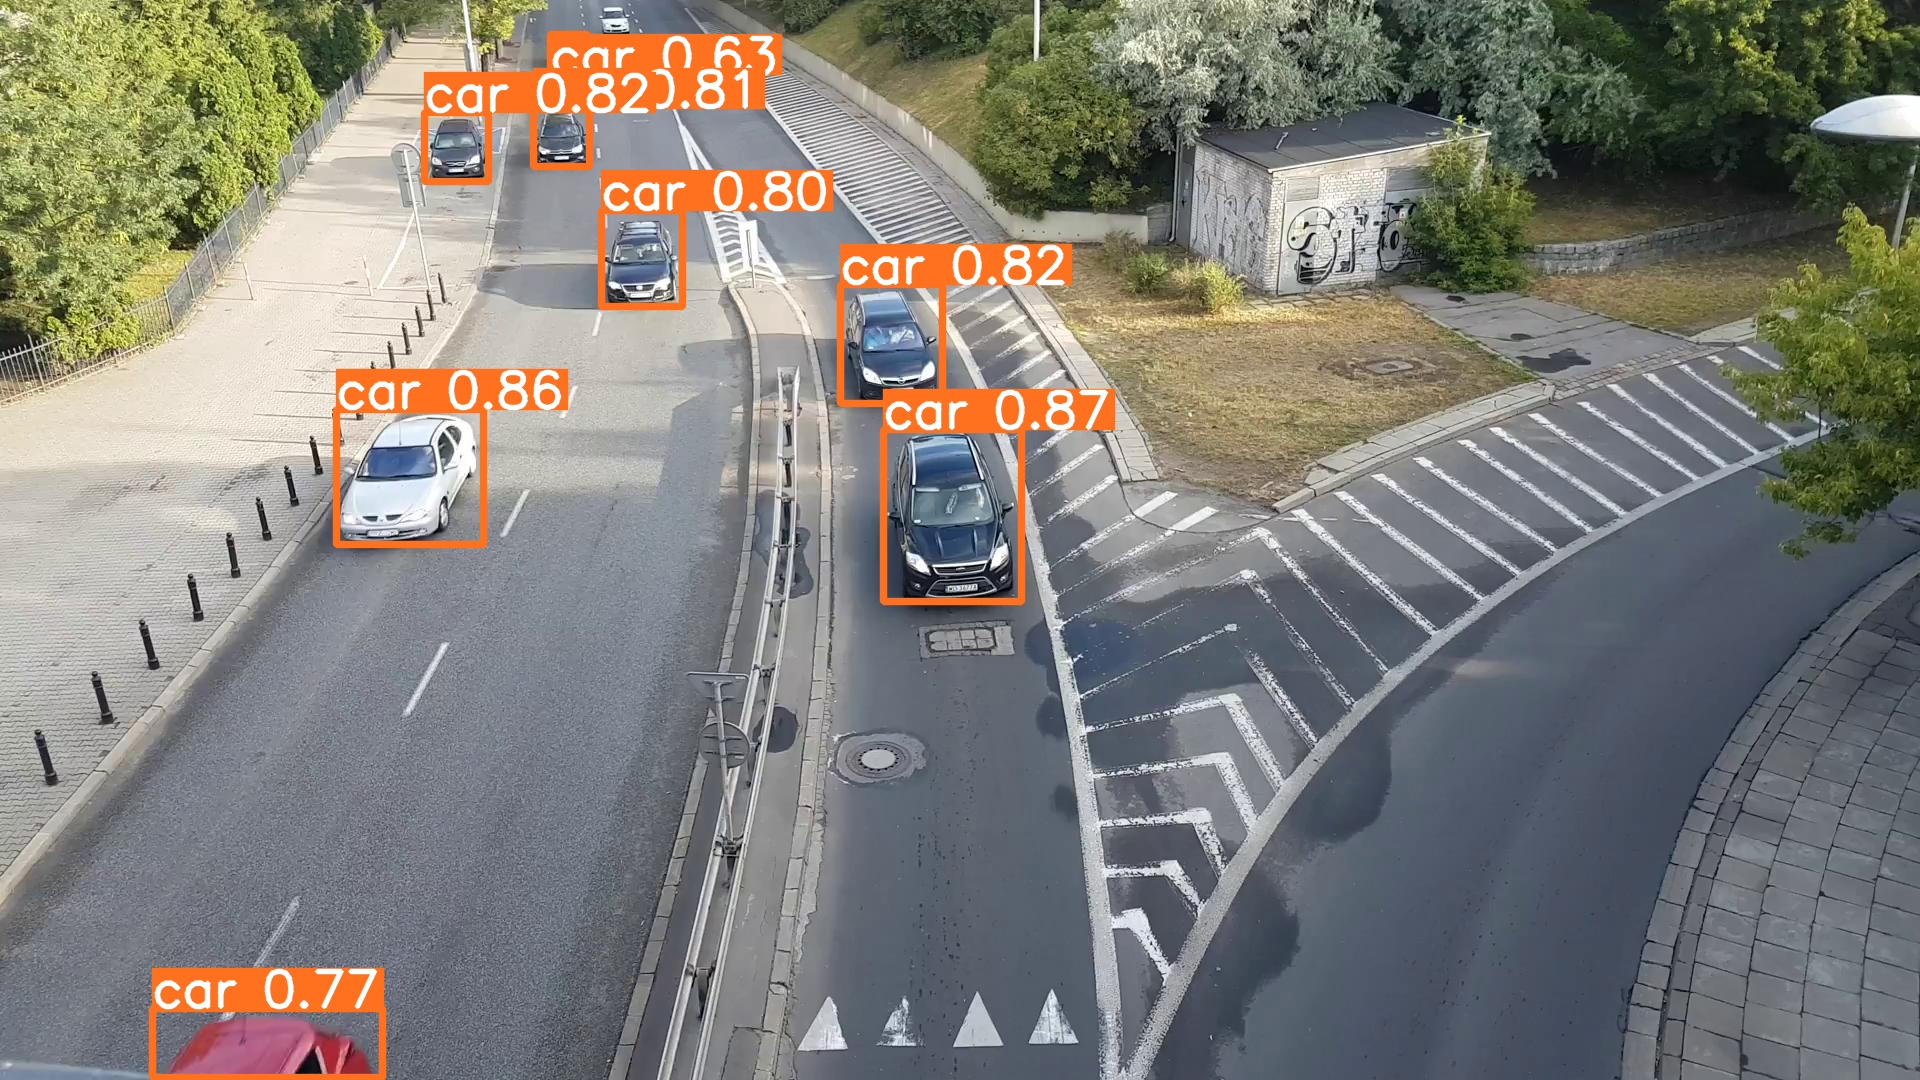

In [30]:
Image(filename="/content/runs/detect/predict/0_png.rf.85255ba703f2d5fe68e4250f55a03c4b.jpg", height=500)

In [33]:
# predicting a video
!yolo task=detect mode=predict model=/content/drive/MyDrive/AI-Project/yolo-custom-object/trained-model/weights/best.pt conf=0.5 source=/content/drive/MyDrive/AI-Project/yolo-custom-object/vehicles.mp4

Ultralytics YOLOv8.0.218 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (1/538) /content/drive/MyDrive/AI-Project/yolo-custom-object/vehicles.mp4: 384x640 2 cars, 1 truck, 68.7ms
video 1/1 (2/538) /content/drive/MyDrive/AI-Project/yolo-custom-object/vehicles.mp4: 384x640 2 cars, 1 truck, 25.8ms
video 1/1 (3/538) /content/drive/MyDrive/AI-Project/yolo-custom-object/vehicles.mp4: 384x640 2 cars, 1 truck, 25.9ms
video 1/1 (4/538) /content/drive/MyDrive/AI-Project/yolo-custom-object/vehicles.mp4: 384x640 2 cars, 1 truck, 25.9ms
video 1/1 (5/538) /content/drive/MyDrive/AI-Project/yolo-custom-object/vehicles.mp4: 384x640 2 cars, 1 truck, 25.9ms
video 1/1 (6/538) /content/drive/MyDrive/AI-Project/yolo-custom-object/vehicles.mp4: 384x640 2 cars, 1 truck, 25.9ms
video 1/1 (7/538) /content/drive/MyDrive/AI-Project/yolo-custom-object/vehicles.mp4: 384x640 1 bus, 2 cars, 1 truck, 25.8ms
vide

In [35]:
# compressing the video
!ffmpeg -i /content/runs/detect/predict/vehicles.avi predicted-video.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

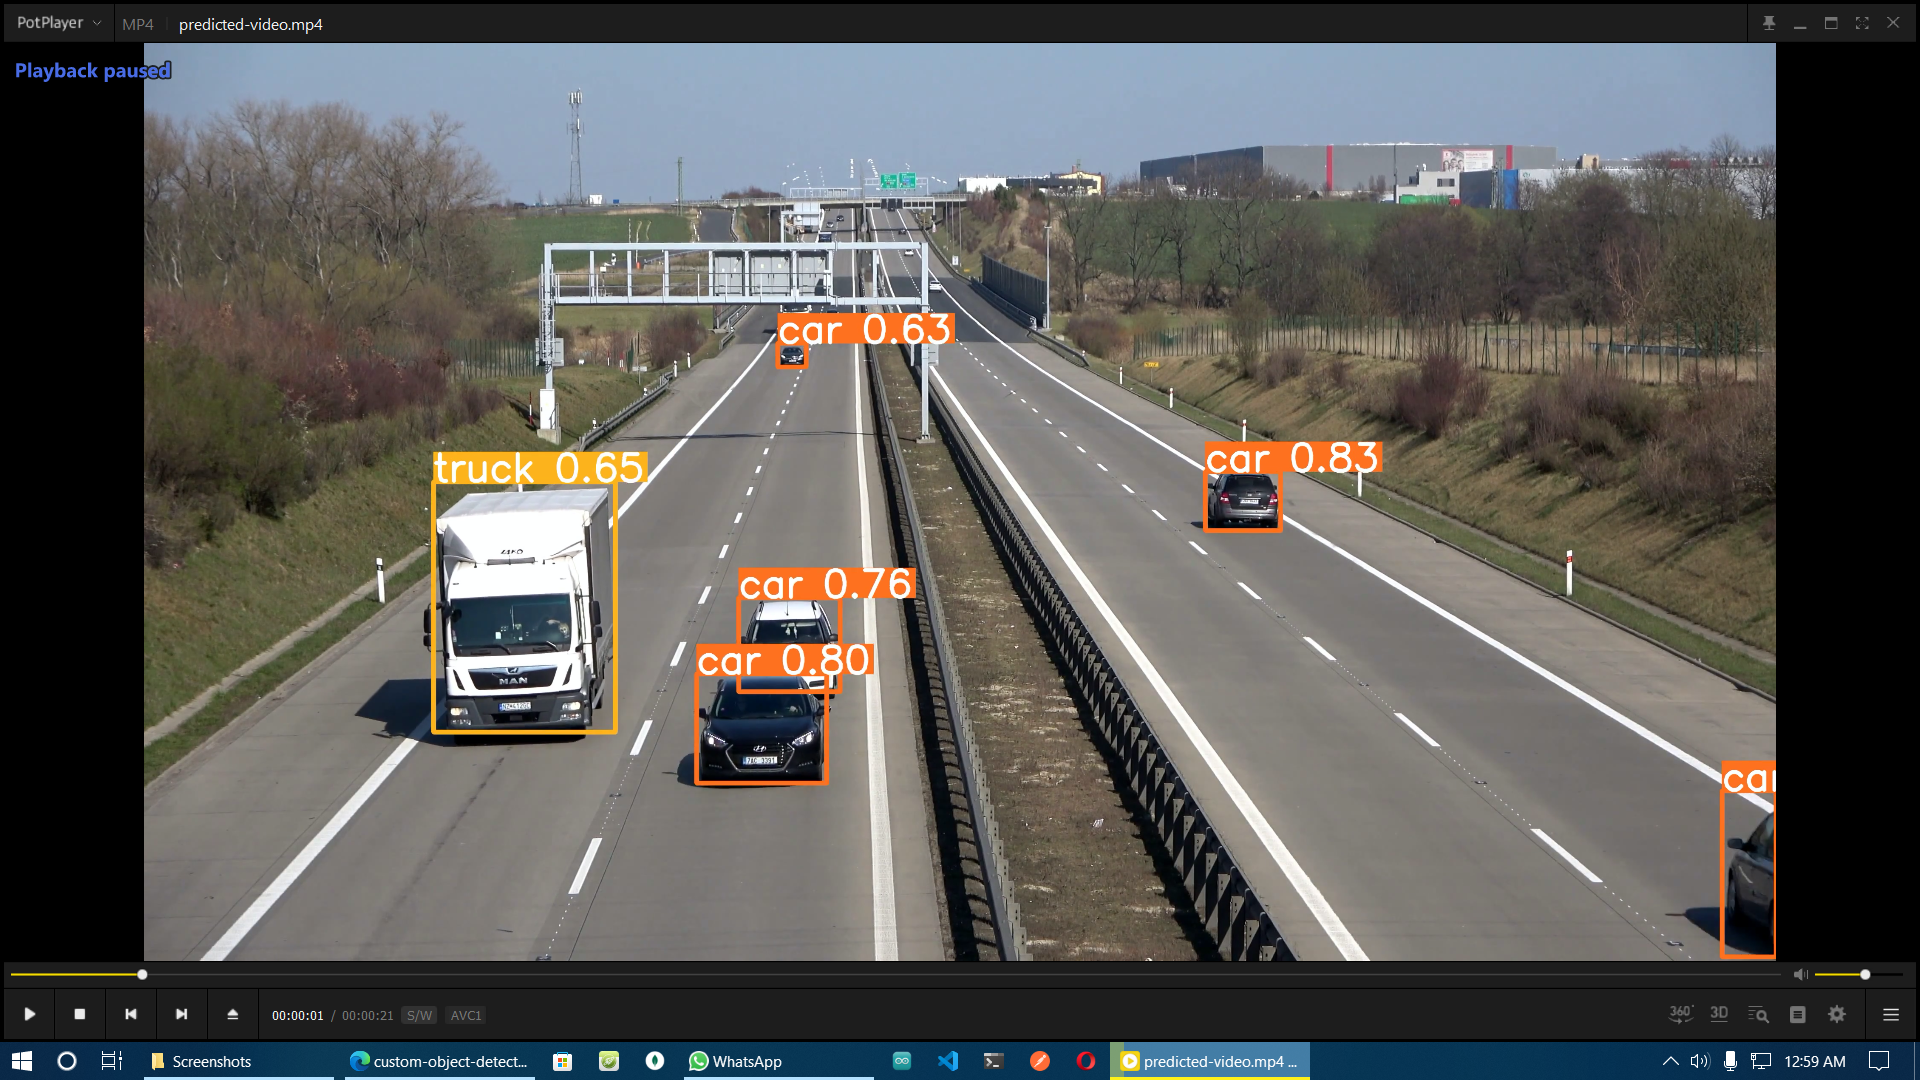

In [44]:
# prediction form video
Image(filename="/content/Screenshot-(1).png", height=500)

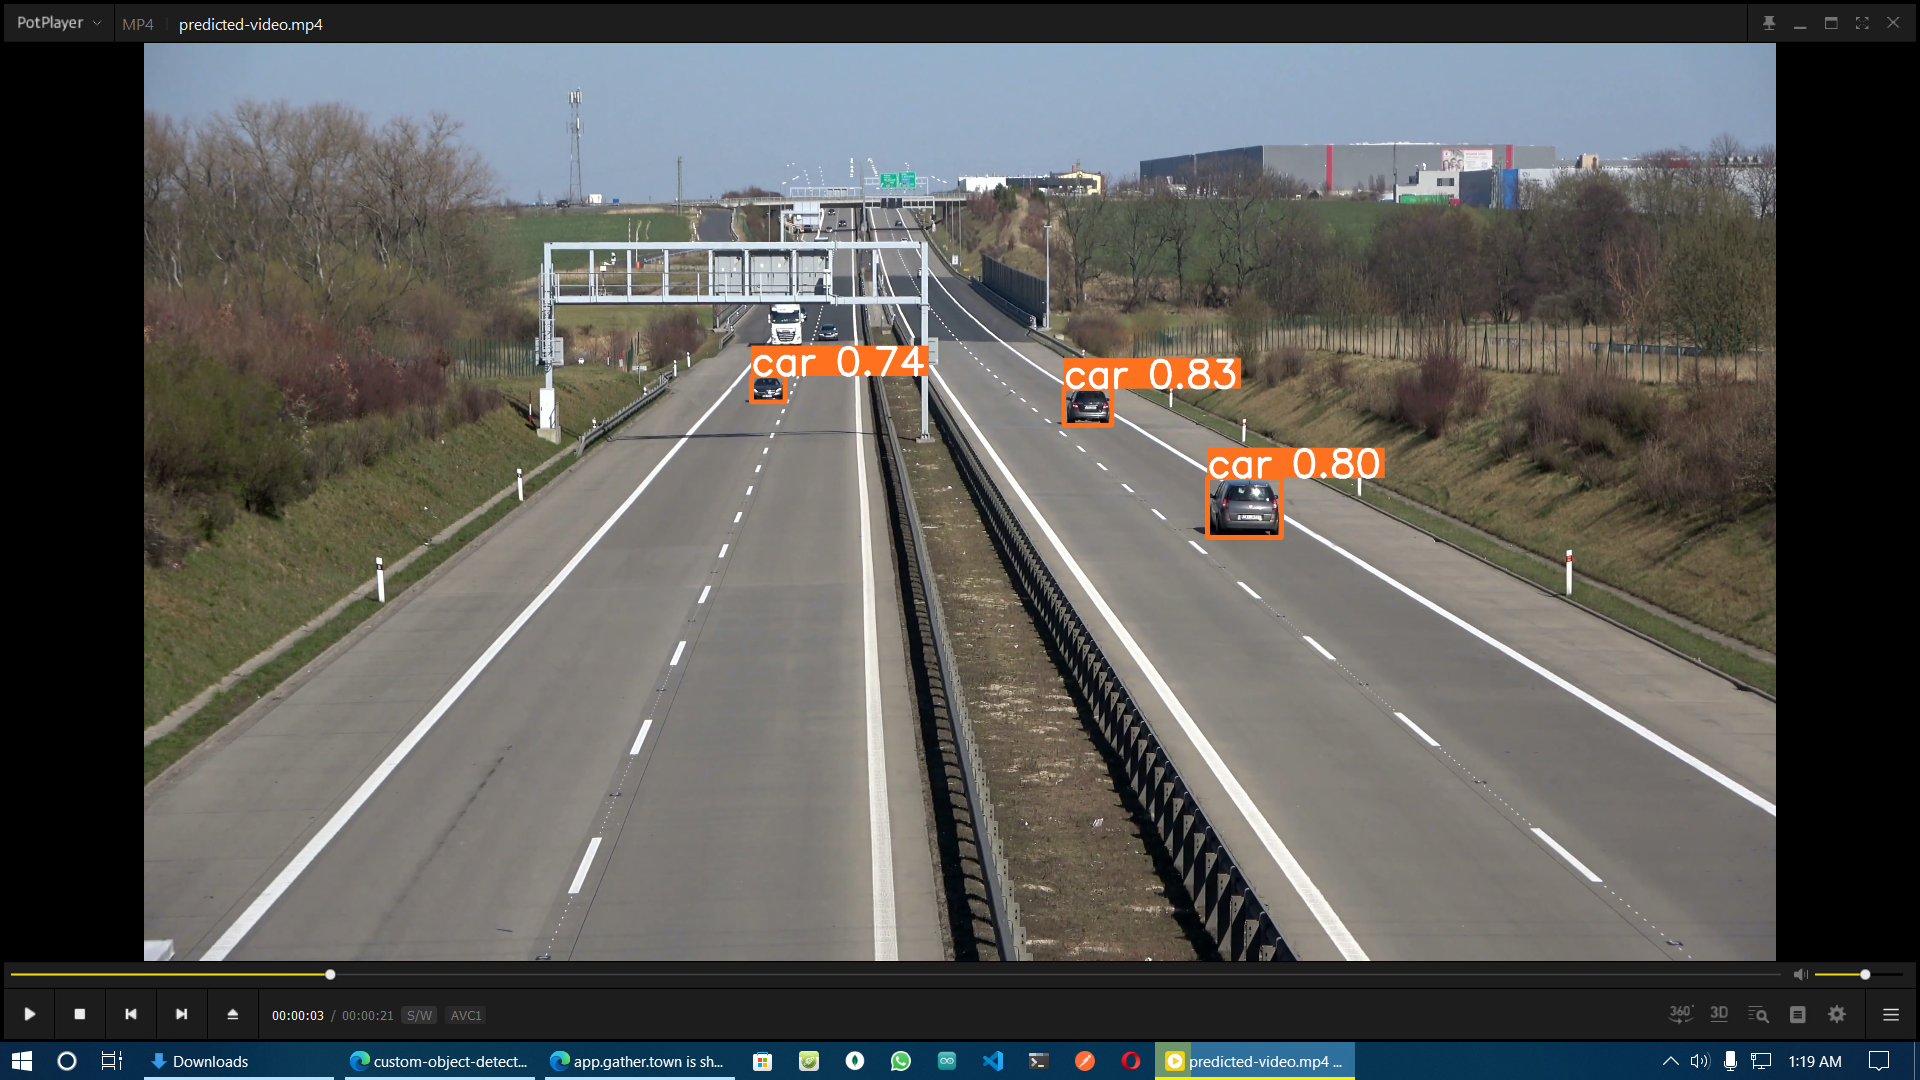

In [46]:
Image(filename="/content/Screenshot-(2).png", height=500)